In [1]:
sc

<SparkContext master=local[*] appName=PySparkShell>

In [2]:
sc.stop()

In [3]:
from pyspark import SparkContext, SparkConf
conf = SparkConf().setAppName("Health").setMaster("local[4]")
sc = SparkContext.getOrCreate(conf=conf)

In [4]:
sc

<SparkContext master=local[4] appName=Health>

In [5]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Health').getOrCreate()

In [6]:
from pyspark.sql.functions import *
from pyspark.sql.types import *

In [7]:
df = spark.read.csv("file:///home/hadoop/Downloads/health.csv",header=True)

In [8]:
df.collect()

[Row(S.No.=u'1', State/ UT=u'Andhra Pradesh', Total Population in Rural Areas=u'56,311,788', Estimated Tribal Population in Rural Areas=u'4,723,312', Sub Centres - Required=u'11,892', Sub Centres - In Position=u'12,522', Sub Centres - Shortfall=u'Surplus', Primary Health Centres (PHCs) - Required=u'1,955', Primary Health Centres (PHCs) - In Position=u'1,624', Primary Health Centres (PHCs) - Shortfall=u'331', Community Health Centres (CHCs) - Required=u'488', Community Health Centres (CHCs) - In Position=u'281', Community Health Centres (CHCs) - Shortfall=u'207'),
 Row(S.No.=u'2', State/ UT=u'Arunachal Pradesh', Total Population in Rural Areas=u'1,069,165', Estimated Tribal Population in Rural Areas=u'744,996', Sub Centres - Required=u'313', Sub Centres - In Position=u'286', Sub Centres - Shortfall=u'27', Primary Health Centres (PHCs) - Required=u'48', Primary Health Centres (PHCs) - In Position=u'97', Primary Health Centres (PHCs) - Shortfall=u'Surplus', Community Health Centres (CHCs)

In [10]:
df_new = df.withColumn("Total Population in Rural Areas",regexp_replace("Total Population in Rural Areas",",",""))

In [11]:
df_new.collect()

[Row(S.No.=u'1', State/ UT=u'Andhra Pradesh', Total Population in Rural Areas=u'56311788', Estimated Tribal Population in Rural Areas=u'4,723,312', Sub Centres - Required=u'11,892', Sub Centres - In Position=u'12,522', Sub Centres - Shortfall=u'Surplus', Primary Health Centres (PHCs) - Required=u'1,955', Primary Health Centres (PHCs) - In Position=u'1,624', Primary Health Centres (PHCs) - Shortfall=u'331', Community Health Centres (CHCs) - Required=u'488', Community Health Centres (CHCs) - In Position=u'281', Community Health Centres (CHCs) - Shortfall=u'207'),
 Row(S.No.=u'2', State/ UT=u'Arunachal Pradesh', Total Population in Rural Areas=u'1069165', Estimated Tribal Population in Rural Areas=u'744,996', Sub Centres - Required=u'313', Sub Centres - In Position=u'286', Sub Centres - Shortfall=u'27', Primary Health Centres (PHCs) - Required=u'48', Primary Health Centres (PHCs) - In Position=u'97', Primary Health Centres (PHCs) - Shortfall=u'Surplus', Community Health Centres (CHCs) - R

In [9]:
for i in df.schema.names:
    if i!='S.No.' and i!='State/ UT':
        df = df.withColumn(i,regexp_replace(i,",",""))

In [10]:
df.schema.names

['S.No.',
 'State/ UT',
 'Total Population in Rural Areas',
 'Estimated Tribal Population in Rural Areas',
 'Sub Centres - Required',
 'Sub Centres - In Position',
 'Sub Centres - Shortfall',
 'Primary Health Centres (PHCs) - Required',
 'Primary Health Centres (PHCs) - In Position',
 'Primary Health Centres (PHCs) - Shortfall',
 'Community Health Centres (CHCs) - Required',
 'Community Health Centres (CHCs) - In Position',
 'Community Health Centres (CHCs) - Shortfall']

In [11]:
df.collect()

[Row(S.No.=u'1', State/ UT=u'Andhra Pradesh', Total Population in Rural Areas=u'56311788', Estimated Tribal Population in Rural Areas=u'4723312', Sub Centres - Required=u'11892', Sub Centres - In Position=u'12522', Sub Centres - Shortfall=u'Surplus', Primary Health Centres (PHCs) - Required=u'1955', Primary Health Centres (PHCs) - In Position=u'1624', Primary Health Centres (PHCs) - Shortfall=u'331', Community Health Centres (CHCs) - Required=u'488', Community Health Centres (CHCs) - In Position=u'281', Community Health Centres (CHCs) - Shortfall=u'207'),
 Row(S.No.=u'2', State/ UT=u'Arunachal Pradesh', Total Population in Rural Areas=u'1069165', Estimated Tribal Population in Rural Areas=u'744996', Sub Centres - Required=u'313', Sub Centres - In Position=u'286', Sub Centres - Shortfall=u'27', Primary Health Centres (PHCs) - Required=u'48', Primary Health Centres (PHCs) - In Position=u'97', Primary Health Centres (PHCs) - Shortfall=u'Surplus', Community Health Centres (CHCs) - Required

preds.toPandas().plot()  # convert data into graph
plt.show()

In [12]:
df_new = df

In [13]:
for i in df_new.schema.names:
    if i == 'Sub Centres - Shortfall' or i == 'Primary Health Centres (PHCs) - Shortfall' or i == 'Community Health Centres (CHCs) - Shortfall':
        df_new = df_new.withColumn(i,regexp_replace(i,"Surplus","0"))

In [14]:
df_new.collect()

[Row(S.No.=u'1', State/ UT=u'Andhra Pradesh', Total Population in Rural Areas=u'56311788', Estimated Tribal Population in Rural Areas=u'4723312', Sub Centres - Required=u'11892', Sub Centres - In Position=u'12522', Sub Centres - Shortfall=u'0', Primary Health Centres (PHCs) - Required=u'1955', Primary Health Centres (PHCs) - In Position=u'1624', Primary Health Centres (PHCs) - Shortfall=u'331', Community Health Centres (CHCs) - Required=u'488', Community Health Centres (CHCs) - In Position=u'281', Community Health Centres (CHCs) - Shortfall=u'207'),
 Row(S.No.=u'2', State/ UT=u'Arunachal Pradesh', Total Population in Rural Areas=u'1069165', Estimated Tribal Population in Rural Areas=u'744996', Sub Centres - Required=u'313', Sub Centres - In Position=u'286', Sub Centres - Shortfall=u'27', Primary Health Centres (PHCs) - Required=u'48', Primary Health Centres (PHCs) - In Position=u'97', Primary Health Centres (PHCs) - Shortfall=u'0', Community Health Centres (CHCs) - Required=u'12', Comm

In [23]:
for i in df_new.schema.names:
    if i!='State/ UT' and i!='S.No.':
        df_new = df_new.withColumn(i,col(i).cast(IntegerType()))

In [31]:
pan1 = df_new;

In [32]:
df_new.printSchema()

root
 |-- S.No.: string (nullable = true)
 |-- State/ UT: string (nullable = true)
 |-- Total Population in Rural Areas: integer (nullable = true)
 |-- Estimated Tribal Population in Rural Areas: integer (nullable = true)
 |-- Sub Centres - Required: integer (nullable = true)
 |-- Sub Centres - In Position: integer (nullable = true)
 |-- Sub Centres - Shortfall: integer (nullable = true)
 |-- Primary Health Centres (PHCs) - Required: integer (nullable = true)
 |-- Primary Health Centres (PHCs) - In Position: integer (nullable = true)
 |-- Primary Health Centres (PHCs) - Shortfall: integer (nullable = true)
 |-- Community Health Centres (CHCs) - Required: integer (nullable = true)
 |-- Community Health Centres (CHCs) - In Position: integer (nullable = true)
 |-- Community Health Centres (CHCs) - Shortfall: integer (nullable = true)



In [33]:
import matplotlib.pyplot as plt
import pandas as pd

In [34]:
df_minus = df_new

In [58]:
df_minus = df_minus.withColumn("Sub Centres - Shortfall",col('Sub Centres - In Position') - col('Sub Centres - Required'))
df_minus = df_minus.withColumn("Primary Health Centres (PHCs) - Shortfall",col('Primary Health Centres (PHCs) - In Position') - col('Primary Health Centres (PHCs) - Required'))
df_minus = df_minus.withColumn("Community Health Centres (CHCs) - Shortfall",col('Community Health Centres (CHCs) - In Position') - col('Community Health Centres (CHCs) - Required'))

In [59]:
df_minus.collect()

[Row(S.No.=u'1', State/ UT=u'Andhra Pradesh', Total Population in Rural Areas=56311788, Estimated Tribal Population in Rural Areas=4723312, Sub Centres - Required=11892, Sub Centres - In Position=12522, Sub Centres - Shortfall=630, Primary Health Centres (PHCs) - Required=1955, Primary Health Centres (PHCs) - In Position=1624, Primary Health Centres (PHCs) - Shortfall=-331, Community Health Centres (CHCs) - Required=488, Community Health Centres (CHCs) - In Position=281, Community Health Centres (CHCs) - Shortfall=-207),
 Row(S.No.=u'2', State/ UT=u'Arunachal Pradesh', Total Population in Rural Areas=1069165, Estimated Tribal Population in Rural Areas=744996, Sub Centres - Required=313, Sub Centres - In Position=286, Sub Centres - Shortfall=-27, Primary Health Centres (PHCs) - Required=48, Primary Health Centres (PHCs) - In Position=97, Primary Health Centres (PHCs) - Shortfall=49, Community Health Centres (CHCs) - Required=12, Community Health Centres (CHCs) - In Position=48, Communit

In [60]:
pan2 = df_minus.toPandas()
pan2

,S.No.,State/ UT,Total Population in Rural Areas,Estimated Tribal Population in Rural Areas,Sub Centres - Required,Sub Centres - In Position,Sub Centres - Shortfall,Primary Health Centres (PHCs) - Required,Primary Health Centres (PHCs) - In Position,Primary Health Centres (PHCs) - Shortfall,Community Health Centres (CHCs) - Required,Community Health Centres (CHCs) - In Position,Community Health Centres (CHCs) - Shortfall
0,1,Andhra Pradesh,56311788,4723312,11892,12522,630,1955,1624,-331,488,281,-207
1,2,Arunachal Pradesh,1069165,744996,313,286,-27,48,97,49,12,48,36
2,3,Assam,26780516,3638841,5841,4604,-1237,953,938,-15,238,108,-130
3,4,Bihar,92075028,889200,18533,9696,-8837,3083,1863,-1220,770,70,-700
4,5,Chhattisgarh,19603658,7377058,4904,5076,172,776,741,-35,194,148,-46
5,6,Goa,551414,155,110,175,65,18,19,1,4,5,1
6,7,Gujarat,34670817,7500509,7934,7274,-660,1280,1123,-157,320,305,-15
7,8,Haryana,16531493,0,3306,2508,-798,551,444,-107,137,107,-30
8,9,Himachal Pradesh,6167805,266701,1269,2067,798,210,453,243,52,76,24
9,10,Jammu & Kashmir,9134820,1262945,1995,1907,-88,325,397,72,81,83,2


In [43]:
pan1

,S.No.,State/ UT,Total Population in Rural Areas,Estimated Tribal Population in Rural Areas,Sub Centres - Required,Sub Centres - In Position,Sub Centres - Shortfall,Primary Health Centres (PHCs) - Required,Primary Health Centres (PHCs) - In Position,Primary Health Centres (PHCs) - Shortfall,Community Health Centres (CHCs) - Required,Community Health Centres (CHCs) - In Position,Community Health Centres (CHCs) - Shortfall
0,1,Andhra Pradesh,56311788,4723312,11892,12522,0,1955,1624,331,488,281,207
1,2,Arunachal Pradesh,1069165,744996,313,286,27,48,97,0,12,48,0
2,3,Assam,26780516,3638841,5841,4604,1237,953,938,15,238,108,130
3,4,Bihar,92075028,889200,18533,9696,8837,3083,1863,1220,770,70,700
4,5,Chhattisgarh,19603658,7377058,4904,5076,0,776,741,35,194,148,46
5,6,Goa,551414,155,110,175,0,18,19,0,4,5,0
6,7,Gujarat,34670817,7500509,7934,7274,660,1280,1123,157,320,305,15
7,8,Haryana,16531493,0,3306,2508,798,551,444,107,137,107,30
8,9,Himachal Pradesh,6167805,266701,1269,2067,0,210,453,0,52,76,0
9,10,Jammu & Kashmir,9134820,1262945,1995,1907,88,325,397,0,81,83,0


df_shortfall = df.select("*").where(df["Shortfall"]>0)
df = df["shortfal1","shortfall2","shortfall3"]

In [62]:
label = []
values = []
j = 0
for i in pan1["State/ UT"]:
        if pan1["Sub Centres - Shortfall"][j]!=0:
            label.append(i)
            values.append(pan1["Sub Centres - Shortfall"][j])
        
        j += 1

In [63]:
label1 = []
values1 = []
j = 0
for i in pan1["State/ UT"]:
        if pan1["Primary Health Centres (PHCs) - Shortfall"][j]!=0:
            label1.append(i)
            values1.append(pan1["Primary Health Centres (PHCs) - Shortfall"][j])
        
        j += 1

In [64]:
label2 = []
values2 = []
j = 0
for i in pan1["State/ UT"]:
        if pan1["Community Health Centres (CHCs) - Shortfall"][j]!=0:
            label2.append(i)
            values2.append(pan1["Community Health Centres (CHCs) - Shortfall"][j])
        
        j += 1

In [54]:
import numpy as np

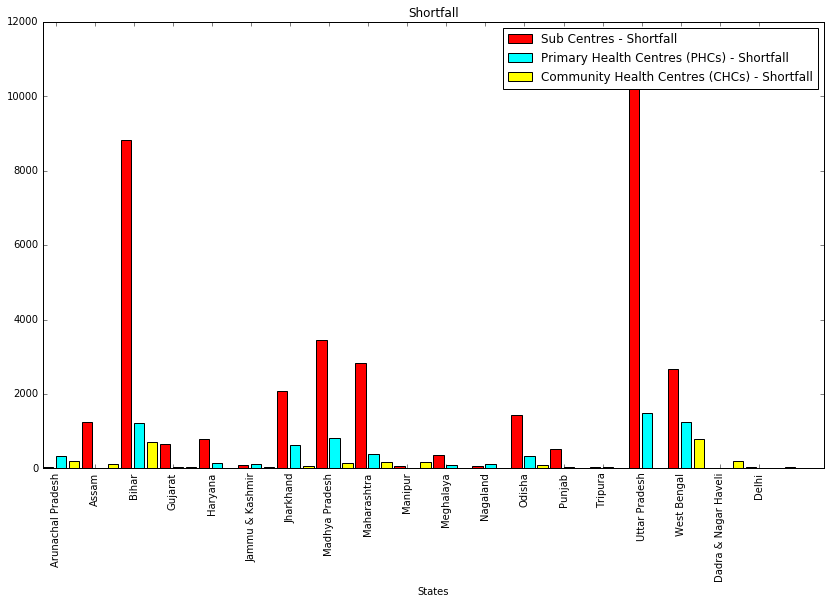

In [135]:
index = [3*i for i in range(len(label))]
index1 = [3*i+1 for i in range(len(label1))]
index2 = [3*i+2 for i in range(len(label2))]
plt.bar(index,values,color='red',label="Sub Centres - Shortfall")
plt.bar(index1,values1,color='aqua',label="Primary Health Centres (PHCs) - Shortfall")
plt.bar(index2,values2,color='yellow',label="Community Health Centres (CHCs) - Shortfall")
plt.xlabel("States")
plt.xticks(index1,label,fontsize = 10,rotation= 90)
plt.title("Shortfall")
plt.legend()
plt.show()
plt.rcParams['figure.figsize']=(1,1)

In [137]:
label3 = []
values3 = []
j = 0
for i in pan2["State/ UT"]:
        if pan2["Sub Centres - Shortfall"][j]>0:
            label3.append(i)
            values3.append(pan1["Sub Centres - Shortfall"][j])
        
        j += 1

In [139]:
label4 = []
values4 = []
j = 0
for i in pan2["State/ UT"]:
        if pan2["Primary Health Centres (PHCs) - Shortfall"][j]>0:
            label4.append(i)
            values4.append(pan1["Primary Health Centres (PHCs) - Shortfall"][j])
        
        j += 1

In [144]:
label5 = []
values5 = []
j = 0
for i in pan2["State/ UT"]:
        if pan2["Community Health Centres (CHCs) - Shortfall"][j]>0:
            label5.append(i)
            values5.append(pan1["Community Health Centres (CHCs) - Shortfall"][j])
        
        j += 1

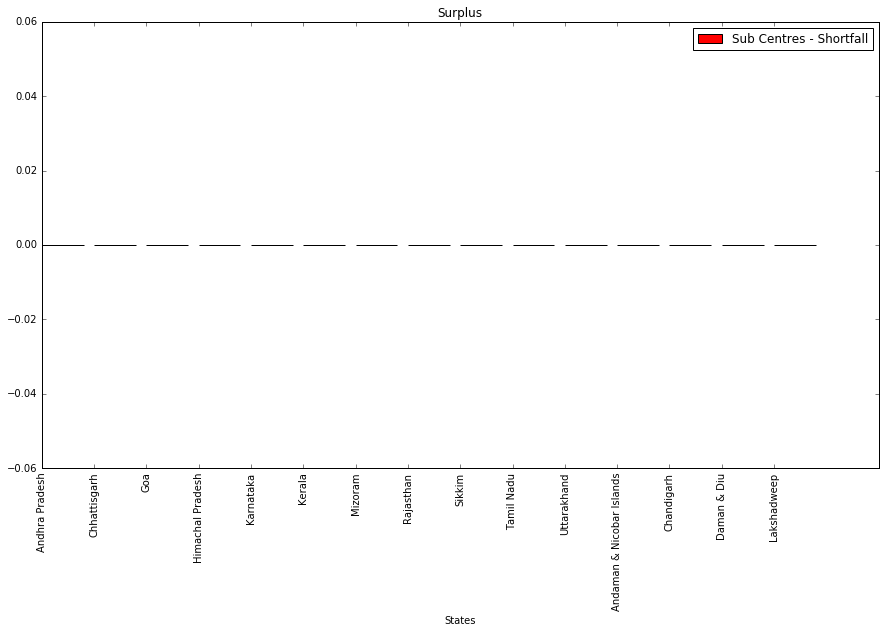

In [153]:
index3 = [i for i in range(len(label3))]
plt.bar(index3,values3,color='red',label="Sub Centres - Shortfall")
plt.xlabel("States")
plt.xticks(index3,label3,fontsize = 10,rotation= 90)
plt.title("Surplus")
plt.legend()
plt.show()
plt.rcParams['figure.figsize']=(1,1)